In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
ahchy = ahchy['Adj Close']
aacay = aacay['Adj Close']
byddy = byddy['Adj Close']
cwycy = cwycy['Adj Close']

In [110]:
dnfgy = dnfgy['Adj Close']

In [111]:
stocks = pd.concat([ahchy,aacay,byddy,cwycy,dnfgy],axis=1)
stocks.columns = ['AHCHY','AACAY','BYDDY','CWYCY','DNFGY']

In [112]:
stocks.head()

,AHCHY,AACAY,BYDDY,CWYCY,DNFGY
Date,,,,,
2013-01-02,17.509827,1.234675,6.014824,10.333914,70.505173
2013-01-03,17.185234,1.214827,5.906360,10.442788,70.311096
2013-01-04,17.022940,1.262736,5.817617,10.442788,70.311096
2013-01-07,17.239330,1.263420,5.876779,10.969009,70.046432
2013-01-08,16.788513,1.185398,6.054265,10.969009,68.326157


In [113]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

AHCHY    0.000687
AACAY    0.002225
BYDDY    0.000988
CWYCY    0.000394
DNFGY    0.000012
dtype: float64

In [114]:
stocks.pct_change(1).corr()

,AHCHY,AACAY,BYDDY,CWYCY,DNFGY
AHCHY,1.000000,0.188899,0.330521,0.267198,0.256678
AACAY,0.188899,1.000000,0.226830,0.080529,0.154793
BYDDY,0.330521,0.226830,1.000000,0.207558,0.257946
CWYCY,0.267198,0.080529,0.207558,1.000000,0.163120
DNFGY,0.256678,0.154793,0.257946,0.163120,1.000000


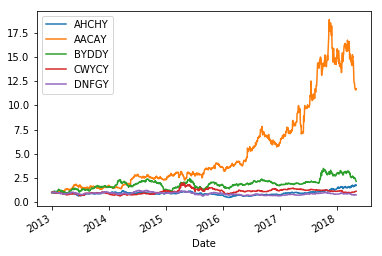

In [115]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [116]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,AHCHY,AACAY,BYDDY,CWYCY,DNFGY
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.018538,-0.016075,-0.018033,0.010536,-0.002753
2013-01-04,-0.009444,0.039437,-0.015025,0.000000,0.000000
2013-01-07,0.012712,0.000542,0.010169,0.050391,-0.003764
2013-01-08,-0.026150,-0.061755,0.030201,0.000000,-0.024559


In [117]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,AHCHY,AACAY,BYDDY,CWYCY,DNFGY
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.018712,-0.016206,-0.018197,0.010480,-0.002756
2013-01-04,-0.009489,0.038679,-0.015139,0.000000,0.000000
2013-01-07,0.012632,0.000542,0.010118,0.049162,-0.003771
2013-01-08,-0.026498,-0.063744,0.029754,0.000000,-0.024866


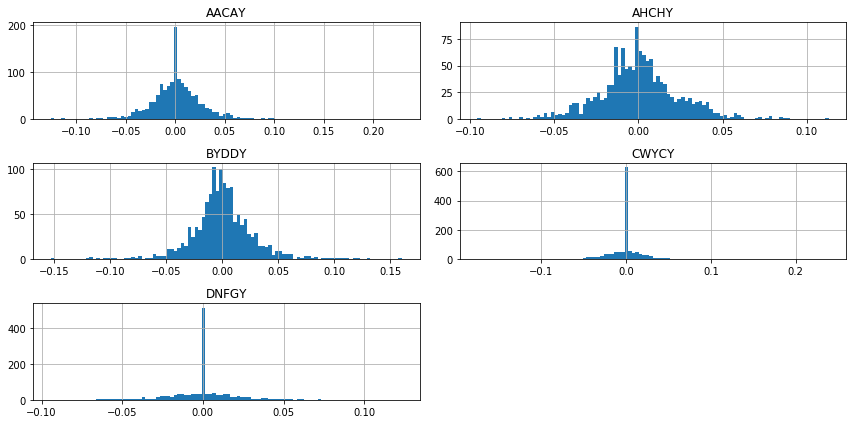

In [118]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [119]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AHCHY,1344.0,0.000405,0.023751,-0.095501,-0.012862,0.000000,0.012799,0.112846
AACAY,1344.0,0.001827,0.027995,-0.125696,-0.012389,0.000000,0.014462,0.228689
BYDDY,1344.0,0.000572,0.028806,-0.152870,-0.013051,-0.000801,0.013793,0.160589
CWYCY,1344.0,0.000090,0.024546,-0.175159,-0.004536,0.000000,0.003334,0.238640
DNFGY,1344.0,-0.000207,0.020895,-0.094376,-0.007153,0.000000,0.005504,0.123413


In [120]:
log_ret.mean() * 252

AHCHY    0.102016
AACAY    0.460449
BYDDY    0.144077
CWYCY    0.022798
DNFGY   -0.052067
dtype: float64

In [121]:
# Compute pairwise covariance of columns
log_ret.cov()

,AHCHY,AACAY,BYDDY,CWYCY,DNFGY
AHCHY,0.000564,0.000128,0.000228,0.000158,0.000128
AACAY,0.000128,0.000784,0.000186,0.000058,0.000091
BYDDY,0.000228,0.000186,0.000830,0.000151,0.000155
CWYCY,0.000158,0.000058,0.000151,0.000603,0.000085
DNFGY,0.000128,0.000091,0.000155,0.000085,0.000437


In [122]:
log_ret.cov()*252 # multiply by days

,AHCHY,AACAY,BYDDY,CWYCY,DNFGY
AHCHY,0.142157,0.032328,0.057551,0.039730,0.032245
AACAY,0.032328,0.197502,0.046856,0.014517,0.022809
BYDDY,0.057551,0.046856,0.209101,0.038037,0.039148
CWYCY,0.039730,0.014517,0.038037,0.151831,0.021332
DNFGY,0.032245,0.022809,0.039148,0.021332,0.110023


In [161]:
# Set seed (optional) to get the same random number(weights)
np.random.seed()

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights  : sum of weights is not 1 --> rebalance 
print('Creating Random Weights')
weights = np.array(np.random.random(5))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)  # normalizing
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR) #####


Stocks
Index(['AHCHY', 'AACAY', 'BYDDY', 'CWYCY', 'DNFGY'], dtype='object')


Creating Random Weights
[0.30688335 0.4271528  0.67446486 0.99188665 0.66839402]


Rebalance to sum to 1.0
[0.10000169 0.13919296 0.21978261 0.32321838 0.21780436]


Expected Portfolio Return
0.10198713113006666


Expected Volatility
0.2480812763040887


Sharpe Ratio
0.4111037021796626


In [168]:
num_ports = 15000 # number of possible positions

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(5))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [169]:
sharpe_arr.max()

1.018600483128391

In [170]:
sharpe_arr.argmax()

14121

In [172]:
all_weights[14121,:]

array([0.04301359, 0.75439956, 0.06211337, 0.13538973, 0.00508375])

In [173]:
max_sr_ret = ret_arr[14121]
max_sr_vol = vol_arr[14121]

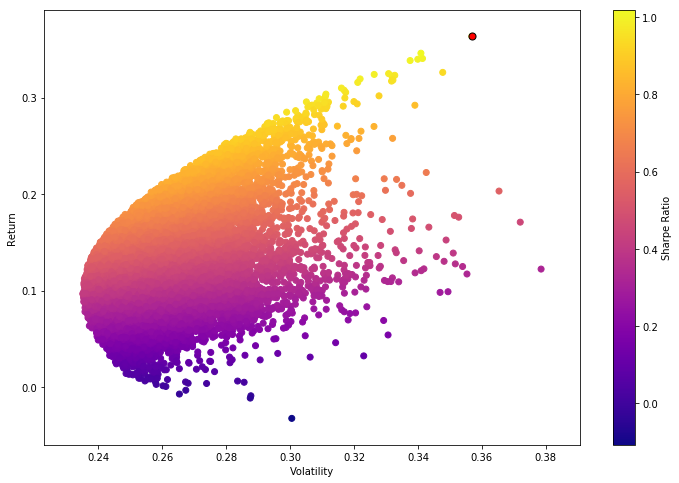

In [174]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [150]:
# Mathematical Optimization
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [151]:
from scipy.optimize import minimize

In [152]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [153]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [154]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [162]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [165]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25,0.25]

In [166]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [175]:
opt_results

     fun: -1.0402747882514978
     jac: array([-1.20674074e-03,  6.75618649e-05,  1.05574727e-04,  5.19424379e-02,
        2.80044883e-01])
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([5.62137694e-02, 8.89164128e-01, 5.46221023e-02, 0.00000000e+00,
       7.73578250e-17])

In [176]:
opt_results.x

array([5.62137694e-02, 8.89164128e-01, 5.46221023e-02, 0.00000000e+00,
       7.73578250e-17])

In [177]:
get_ret_vol_sr(opt_results.x)

array([0.42301887, 0.40664147, 1.04027479])

In [179]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.5,100) # Change 100 to a lower number for slower computers!

In [180]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]  # return volatility

In [181]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

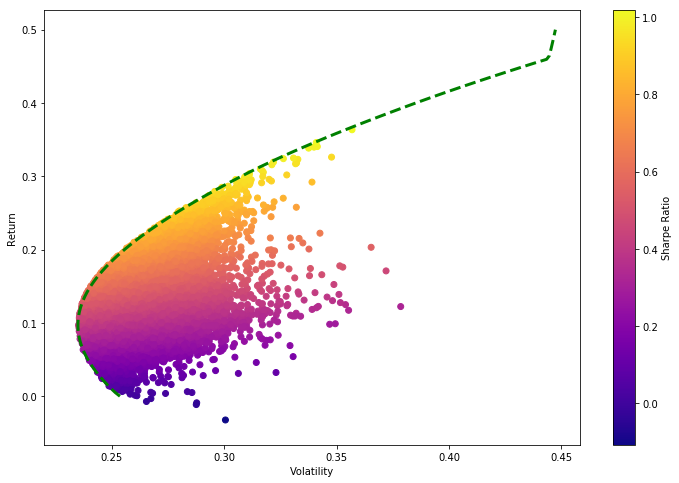

In [182]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)